In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from joblib import dump
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
data = pd.read_pickle("./data_cleaned_class.pkl")

In [0]:
data

,flair,title,flair_id
0,Business/Finance,allow bank hold passport loan taker madras sug...,0
1,Policy/Economy,tamil nadu usher new year green note ban singl...,1
2,Policy/Economy,bad npa crisis say rbi report,1
3,Sports,ravi shastri comment keefe kerry keefe joke ma...,5
4,Photography,picture click pillar rock kodaikanal recent tr...,6
...,...,...,...
20743,Coronavirus,india leave behind local transmission phase mo...,10
20744,Policy/Economy,side story small businessman,1
20745,Coronavirus,indian astronaut train hold russia due covid l...,10
20746,Coronavirus,covid government threaten kashmir doctor stric...,10


In [0]:
X = data['title']
y = data['flair_id']

In [0]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, data.index, random_state=50, stratify=y)
print(y_train.mean(), y_test.mean())

4.872758820127241 4.871987661461346


### Count-Vectorizer

In [0]:
tf_vectorizer = CountVectorizer(max_df=0.2, ngram_range=(1,1))#, max_features=5000
X_train_tf=tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)
# tf_feature_names = tf_vectorizer.get_feature_names()
# doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))

#### Logistic Regression

In [0]:
logreg = LogisticRegression(class_weight='balanced', max_iter=200)
logreg.fit(X_train_tf, y_train)
logreg.score(X_test_tf, y_test)

0.575091575091575

#### Multinomial Naive Bayes

In [0]:
mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train)
mnb.score(X_test_tf, y_test)

0.5793329477540003

#### SVC

In [0]:
svc = LinearSVC(max_iter=2000, class_weight='balanced')
svc.fit(X_train_tf, y_train)
svc.score(X_test_tf, y_test)

0.5465587044534413

#### Random Forest

In [0]:
rand = RandomForestClassifier(n_estimators=200)
rand.fit(X_train_tf, y_train)
rand.score(X_test_tf, y_test)

0.5309427414690573

### Count-Vectorizer Bi-Gram

In [0]:
tf_vectorizer = CountVectorizer(max_df=0.2,ngram_range=(1,2))
X_train_tf=tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

#### Logistic Regression

In [0]:
logreg = LogisticRegression(class_weight='balanced', max_iter=200)
logreg.fit(X_train_tf, y_train)
logreg.score(X_test_tf, y_test)

0.5880084827453248

#### Multinomial Naive Bayes

In [0]:
mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train)
mnb.score(X_test_tf, y_test)

0.5650665124349334

#### SVC

In [0]:
svc = LinearSVC(max_iter=2000)
svc.fit(X_train_tf, y_train)
svc.score(X_test_tf, y_test)

0.5646809331019857

#### Random Forest

In [0]:
rand = RandomForestClassifier(n_estimators=200)
rand.fit(X_train_tf, y_train)
rand.score(X_test_tf, y_test)

0.5288220551378446

### TF-IDF

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.2, use_idf=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Logistic Regression

In [0]:
logreg = LogisticRegression(class_weight='balanced', max_iter=200)
logreg.fit(X_train_tfidf, y_train)
logreg.score(X_test_tfidf, y_test)

0.6020821283979179

#### Multinomial Naive Bayes

In [0]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
mnb.score(X_test_tfidf, y_test)

0.5789473684210527

#### SVC

In [0]:
svc = LinearSVC(max_iter=2000, class_weight='balanced')
svc.fit(X_train_tfidf, y_train)
svc.score(X_test_tfidf, y_test)

0.5806824754193175

#### Random Forest

In [0]:
rand = RandomForestClassifier(n_estimators=200)
rand.fit(X_train_tfidf, y_train)
rand.score(X_test_tfidf, y_test)

0.5708502024291497

### TF-IDF Bi-gram

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.2,stop_words='english',ngram_range=(1,2),use_idf=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Logistic Regression

In [0]:
logreg = LogisticRegression(class_weight='balanced', max_iter=200)
logreg.fit(X_train_tfidf, y_train)
logreg.score(X_test_tfidf, y_test)

0.6020821283979179

#### Multinomial Naive Bayes

In [0]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
mnb.score(X_test_tfidf, y_test)

0.5860805860805861

#### SVC

In [0]:
svc = LinearSVC(class_weight='balanced',max_iter=2000)
svc.fit(X_train_tfidf, y_train)
svc.score(X_test_tfidf, y_test)

0.603431656063235

#### Random Forest

In [0]:
rand = RandomForestClassifier(n_estimators=200)
rand.fit(X_train_tfidf, y_train)
rand.score(X_test_tfidf, y_test)

0.5617890881048776

## Model Evaluation
Taking our best model SVC(linear), evaluation the model for identifying discrepancies in the predicted and actual labels

In [0]:
label_to_id = {"Business/Finance" : 0,
"Policy/Economy" : 1,
"[R]eddiquette" : 2,
"Food" : 3,
"Science/Technology" : 4,
"Sports" : 5,
"Photography" : 6,
"Politics" : 7,
"AskIndia" : 8,
'CAA-NRC' : 9,
'Coronavirus' : 10,                         
}

id_to_label = {v: k for k, v in label_to_id.items()}

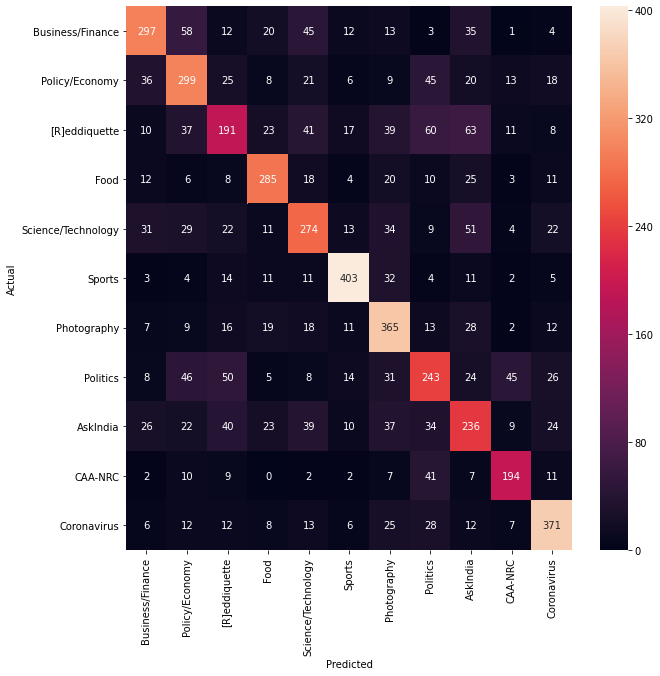

In [0]:
y_pred = svc.predict(X_test_tfidf)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_to_id.keys(), yticklabels=label_to_id.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from IPython.display import display
for predicted in label_to_id.values():
    for actual in label_to_id.values():
        if predicted != actual and conf_mat[actual, predicted] >= 50:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_label[actual], id_to_label[predicted], conf_mat[actual, predicted]))
            display(data.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['flair', 'title']])
            print('')

'Business/Finance' predicted as 'Policy/Economy' : 58 examples.


,flair,title
6992,Business/Finance,forex reserve hit record high billion
3169,Business/Finance,wealth word day exchange trade fund
7572,Business/Finance,question receive overseas payment paypal hello...
550,Business/Finance,global steam generator iron market stabil bert...
5396,Business/Finance,ngo head dupe people hold crore housing scam
6897,Business/Finance,agri export apeda organise buyer seller meet m...
943,Business/Finance,book low budget flat north kolkata within lakh
8341,Business/Finance,maruti suzuki july sale crash two year low
9494,Business/Finance,finance minister nirmala sitharaman announces ...
2595,Business/Finance,oyo world seventh large hotel chain hospitalit...



'Politics' predicted as '[R]eddiquette' : 50 examples.


,flair,title
14919,Politics,pariksha charcha alok
12341,Politics,difference indias tourism pakistan tourism eve...
14322,Politics,escape responsibility point blame past govt sa...
14759,Politics,invitation statue worshipper india
17967,Politics,political crisis governor lalji tandon direct ...
8254,Politics,news paper read todays news paper front page r...
11980,Politics,high alert nagaland manipur october naga peace...
11751,Politics,get fact sake family son kamleshtiwarilynched ...
10817,Politics,gurubari song sharbeswar bhoi odia music samba...
10630,Politics,evidence chidambaram say ram



'[R]eddiquette' predicted as 'Politics' : 60 examples.


,flair,title
1615,[R]eddiquette,hyderabad couple force marry hindu activist va...
2852,[R]eddiquette,watch comedian face flak boast sikh passenger ...
10298,[R]eddiquette,brutal british rule roast
2223,[R]eddiquette,balakot airstrikes unanswered question
4942,[R]eddiquette,uncover humble chaiwallah billion dollar lifes...
10047,[R]eddiquette,editor india long run defence magazine force a...
601,[R]eddiquette,police leadership india fail either lead refor...
10246,[R]eddiquette,vit bhopal fresher party
8273,[R]eddiquette,idk say
10415,[R]eddiquette,actor turn politician urmila matondkar quit co...



'[R]eddiquette' predicted as 'AskIndia' : 63 examples.


,flair,title
1775,[R]eddiquette,horrible experience select dth channel poor jo...
2090,[R]eddiquette,advice require sell car year ago buyer transfe...
800,[R]eddiquette,serious desi quote say use life wise say perha...
9676,[R]eddiquette,many aware cnc machine use use today buy price...
9549,[R]eddiquette,nadia comaneci praise school kid perform gymna...
...,...,...
3997,[R]eddiquette,telugu actress bhargavi anusha reddy kill road...
3181,[R]eddiquette,audiophiles inform person please help noob are...
2400,[R]eddiquette,move delhi temporarily bore lonely ideas fun s...
9361,[R]eddiquette,redditors suggest gift idea year old niece loo...



'Science/Technology' predicted as 'AskIndia' : 51 examples.


,flair,title
8134,Science/Technology,anyone use api service aadhaar detail
9878,Science/Technology,happy teacher day quote
7032,Science/Technology,repost need participant msc research study age...
5672,Science/Technology,tata institute fundamental research mumbai est...
2328,Science/Technology,anyone chegg account willing give solution cas...
12448,Science/Technology,cosmic link zodiac sign zodiac sign compatibility
11573,Science/Technology,social medium market trend take look believe k...
10704,Science/Technology,amazon alexa speak hindi
144,Science/Technology,dmaic dmadv dfss six sigma methodology differe...
8132,Science/Technology,good goind anand kumar


It can be see, some of the misclassified flairs are the flairs that directed towards more than one subjects, for example, Bisiness/Finance and Policy/Economy. Similarly, for posts in [R]eddiquette, which are miscalssified as politics and vise-versa are politically oriented, even for a human it's not easy to discern these posts as to which flair category the posts belong to. Also, Science/Technology posts predicted as AskIndia are technology related questions under AskIndia categories.

### Chi-square test
Chi-Square test to check the consistency with expected correlation

In [0]:

N = 2
for flair, flair_id in sorted(label_to_id.items()):
    indices = np.argsort(svc.coef_[flair_id])
    feature_names = np.array(tfidf_vectorizer.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(flair))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))



# 'AskIndia':
  . Top unigrams:
       . advice
       . anyone
  . Top bigrams:
       . know fact
       . whatsapp group
# 'Business/Finance':
  . Top unigrams:
       . grotal
       . business
  . Top bigrams:
       . know talk
       . website survey
# 'CAA-NRC':
  . Top unigrams:
       . caa
       . npr
  . Top bigrams:
       . delhi riot
       . yeah yeah
# 'Coronavirus':
  . Top unigrams:
       . covid
       . coronavirus
  . Top bigrams:
       . stay safe
       . social distancing
# 'Food':
  . Top unigrams:
       . food
       . recipe
  . Top bigrams:
       . know true
       . university project
# 'Photography':
  . Top unigrams:
       . shot
       . beach
  . Top bigrams:
       . best song
       . full movie
# 'Policy/Economy':
  . Top unigrams:
       . report
       . economy
  . Top bigrams:
       . india growth
       . talk kashmir
# 'Politics':
  . Top unigrams:
       . bjp
       . modi
  . Top bigrams:
       . true number
       . full story
# 'S

While some local positioning information can be preserved by extracting n-grams instead of individual words, frequency-based feature destroy most of the inner structure of the document and hence most of the meaning carried by that internal structure. Hence, model trained on such features, often saturate and in most cases do not perform well.

In order to address this, the local structure of complete sentences and paragraphs should be taken into account.

### Classification Report

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=label_to_id.keys()))

                    precision    recall  f1-score   support

  Business/Finance       0.68      0.59      0.63       500
    Policy/Economy       0.56      0.60      0.58       500
     [R]eddiquette       0.48      0.38      0.42       500
              Food       0.69      0.71      0.70       402
Science/Technology       0.56      0.55      0.55       500
            Sports       0.81      0.81      0.81       500
       Photography       0.60      0.73      0.66       500
          Politics       0.50      0.49      0.49       500
          AskIndia       0.46      0.47      0.47       500
           CAA-NRC       0.67      0.68      0.67       285
       Coronavirus       0.72      0.74      0.73       500

          accuracy                           0.61      5187
         macro avg       0.61      0.61      0.61      5187
      weighted avg       0.61      0.61      0.61      5187



After evalutating the misclassification, it can be concluded that, major of the mis-classifications occur when the posts to be classified touch more than one topic. The task of flair classification cannot be associated as a multi-class classification problem, rather it's a multi-label classification problem. 

### Preparing Pipeline

In [0]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(max_df=0.2,stop_words='english',ngram_range=(1,2),use_idf=True)), ('clf', LinearSVC(class_weight='balanced',max_iter=2000))])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6020821283979179

In [0]:
dump(pipeline, "../model/model_svc.joblib")

['model_logreg.joblib']